# PW 1 - Markovian models  
Sampling of Markovian models.

The aim of this session is to program the Gibbs sampler algorithm and study it in the binary case. 

In this section we consider a binary Markov random field (taking values in $E=\{0,1\}$). 
The neighborhood is defined in 4-connexity and the potential of a clique of order 2 is defined by :
$U_c(0,1)=U_c(1,0)=+\beta$ and $U_c(1,1)=U_c(0,0)=0$ (the potential for singleton clique is 0).


In [81]:
import math
import random
import numpy as np
import platform
import tempfile
import os
import matplotlib.pyplot as plt
import imageio
from scipy import ndimage as ndi

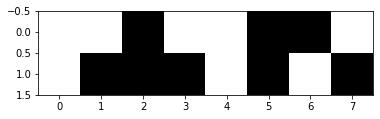

In [ ]:
#Do not compile
plt.set_cmap('gray')
 
sh=[2,8]

imaU=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(imaU)

#Q1 
For the Ising model defined above, and the imaU generated in the previous cell, give the formula of the global energy and give its value as a function of $\beta$ for imaU.

#A1 
Since we have to add a $\beta$ every time there is  a change in the pixel color, U(x) is going to be:

U(x)=13$\beta$ 

9 horizontal changes and 4 vertical changes.

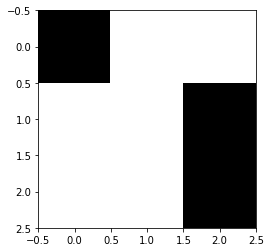

In [9]:
#Do not compile
plt.set_cmap('gray')
sh=[3,3]

imaVois=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(imaVois)

#Q2 

Write the general form of the local conditional probability in a pixel $s$. For the neighborhood configuration imaVois generated by the previous code cell, compute the 2 local conditional energies (for the value 0 and for the value 1 of the central pixel), then the local conditional probabilities (as a function of $\beta$). What is the most probable class ? (NB: do the calculation for an 8-neighborhood).


#A2
Pr(X$_s$=x$_s$|X$^s$=x$^s$)=$\frac{Pr(X=x)}{\sum_{\zeta \in E}Pr(X=x')} $

U(x) is the addiction of the state (0$\to$(black) or 1$\to$(white)) of all the cliques

X$_s$=0 U(x)=5$\beta$

X$_s$=1 U(x)=3$\beta$

P(X$_s$=0|V$_s$)= $\frac{e^{-5\beta}}{Z_s}$

P(X$_s$=1|V$_s$)= $\frac{e^{-3\beta}}{Z_s}$

P(X$_s$=0|V$_s$)+P(X$_s$=1|V$_s$)=1 

$\frac{e^{-5\beta}}{Z_s}$+$\frac{e^{-3\beta}}{Z_s}$=1

$Z_s$=$e^{-5\beta}$+$e^{-3\beta}$

Between the two the more probable is X$_s$=1, since the energy is lower! 

## Part 1

Programming the Gibbs sampler and drawing samples of Markovian models 



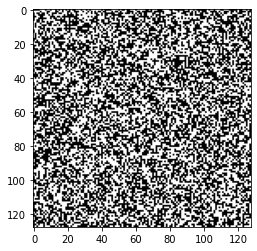

In [82]:
plt.set_cmap('gray')
 
sh=[128,128]

im_bin=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(im_bin)

### Sampling function
Complete the following function which takes as input a binary image (which will be updated by Gibbs sampling) and the value of the regularization parameter.


In [83]:
def echan(im_bin,beta_reg):

    i=0;
    j=0;

    for i in range(im_bin.shape[0]):
        for j in range(im_bin.shape[1]):
          # do not change these indices 
          # they allow access to neighboring pixels  
          # i1,j and i2,j and i,j1 and i,j2
            i1=(i-1)%im_bin.shape[0]
            i2=(i+1)%im_bin.shape[0]
            j1=(j-1)%im_bin.shape[1]
            j2=(j+1)%im_bin.shape[1]

        # complete the calculation of energies and associated probabilities 
        # energy and non-normalized proba when the pixel is put in class 0
            Ureg0=(im_bin[i1,j]  + im_bin[i2,j] + im_bin[i,j1] + im_bin[i,j2])*beta_reg
            p0=math.exp(-Ureg0);

        # energy and non-normalized proba when the pixel is put in class 1
            Ureg1=(np.abs(im_bin[i1,j]-1)  + np.abs(im_bin[i2,j]-1) + np.abs(im_bin[i,j1]-1) + np.abs(im_bin[i,j2]-1))*beta_reg

            p1=math.exp(-Ureg1);

        # sampling according to the normalized probabilities. NB: the normalization is done here
            #print('p0: ',p0)
            #print('p1: ',p1)
            if (p0+p1!=0.):
                if(random.uniform(0,1)<p0/(p0+p1)):
                    #print('random prob: ',random.uniform(0,1))
                    #print('bho: ',p0/(p0+p1))
                    im_bin[i,j]= 0
                else :
                    im_bin[i,j]= 1

    return im_bin

 
By varying the value of the regularization parameter and restarting the cell, observe. You can remove the visualization during sampling and increase the number of iterations

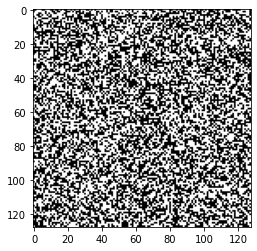

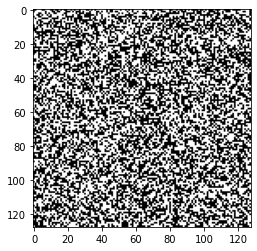

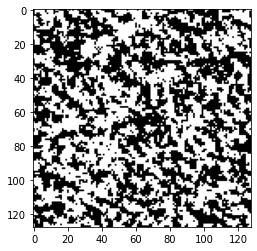

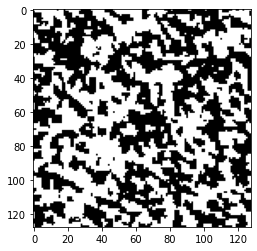

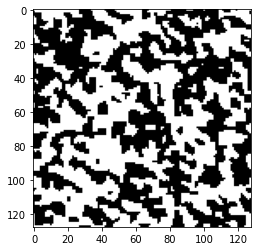

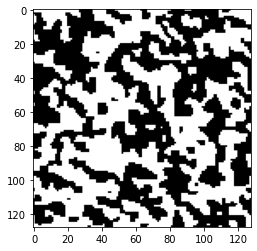

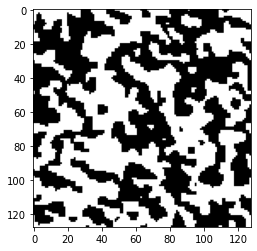

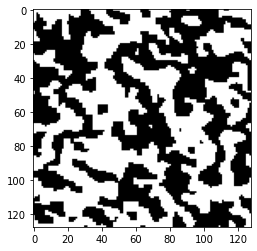

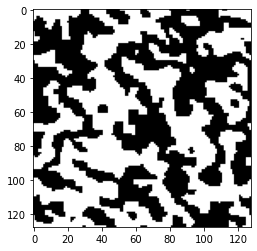

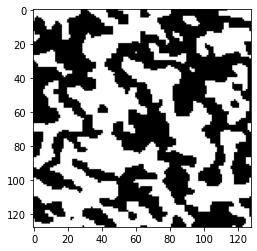

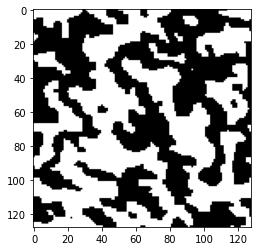

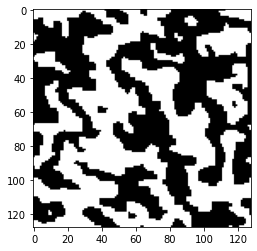

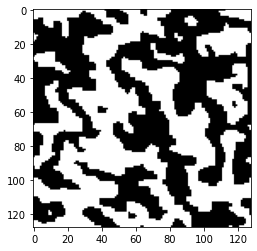

In [84]:
# random initialization of im_bin
plt.set_cmap('gray')
sh=[128,128]
im_bin=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(im_bin)

beta_reg=20
# 0.5 to 20

mafigure=plt.figure()
plt.imshow(im_bin);        
mafigure.canvas.draw()
plt.show()

for n in range(10):  
    echan(im_bin,beta_reg) 
    plt.imshow(im_bin)      
    mafigure.canvas.draw()
    plt.show(block=False)
    

plt.figure()
plt.imshow(im_bin)
plt.show()

#Q3
Run the program several times. Do you still get the same image? Comment on this.

#A3
They keep changing, for two main reasons:  

1.   The initial image is randomly created every time
2.   The association with one class or another depends on a random number we take (random.uniform(0,1)).


Also if we change the $beta\_reg$ we have different results. 

$beta\_reg$=100

First Iteration, first run:

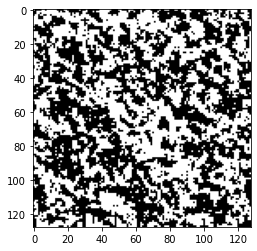

First Iteration, second run:

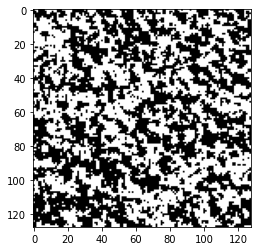





#Q4

Vary $\beta$ from 0.5 to 20. Comment on the results.



#A4
If $\beta$ is positive the model is called ferromagnetic, it tends to create homogenotybtween the pixels, if it's negative it's antiferromagnetic, it encreases diversity. 

With $\beta$=0.5, we can see that we are favourating diversity between pixels, this because if we consider the extreme case of $\beta$=0, all the probability would be equal, and the casuality between pixels would be maximased.

On the other hand with $\beta$=20 we have higher homogenuity, since we are favourating similarity between pixels.

$\beta$=0.5

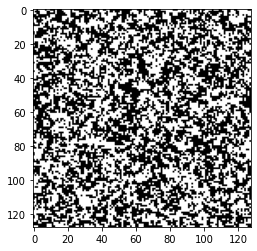

$\beta$=20

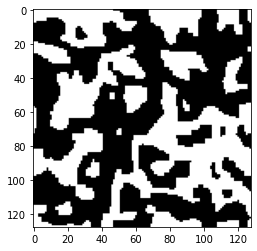

#Q5 
Which image minimizes the overall energy for this model? 

#A5
Images that minimize the overall energy for this model are:


1.   for $\beta$>0: images all white or all black, since, the higher the difference between pixels, the higher the energy and the smaller the probability, so since this two images don't have any difference between their pixels, the energy is U(x)=0, and the probability is maximised.
2.   for $\beta$<0: completely disorder images(we want to maximise the difference between neighbouring pixels), since, the higher the difference between pixels, the higher the energy and the higher the probability.




#Q6
Change 𝛽 and give it a negative value. Describe the result and justify it.

#A6
If we change $\beta$ to a negative value, we are favouriting diversity(disorder), that's why almost all the pixels are different with respect to their neighbours. 
This because, with a negative value of $\beta$, to maximise the probability the energy need to be maximised.

The pattern that we can see is due to some errors caused by the computer computation. 

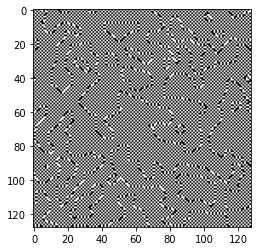


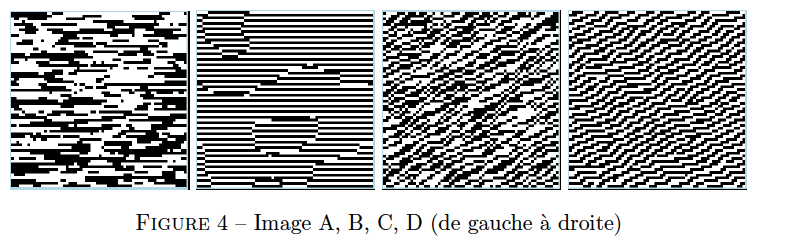

#Q7 
We now work in 8-neighborhood, but still with cliques of order 2 (non-isotropic this time). For each of the following images, propose the clique potentials that allow us to obtain these realizations. Initially all clique potentials are zero. 


* Image A : there is only one clique potential of order 2 which is -1.
* Image B : in addition to the previous one, there is a clique potential of order 2 which is 1. Indicate which one.
* Image C: in addition to the 2 previous ones, there is a clique potential of order 2 which is -1. Indicate which one.
* Image D: in addition to the 3 previous ones, there is a second order clique potential which is +1. Indicate which one.





Code for answering the question 

#A7

Starting from the initial image to Image A, there is only one clique potential of order 2 which is -1, it's the horizontal one.

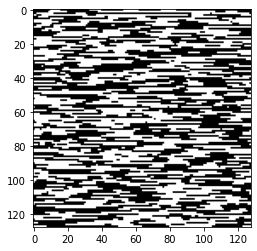

To have image B, in addition to the previous one, there is a clique potential of order 2 which is 1, it's the vertical one. 

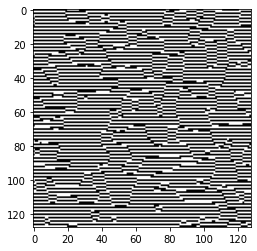

To achive image C, in addition to the 2 previous ones, there is a clique potential of order 2 which is -1. It's the oblique one, " \ ".

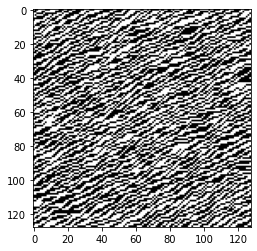

Finally, for image D, in addition to the 3 previous ones, there is a second order clique potential which is +1. It's once again an oblique one,"/". 

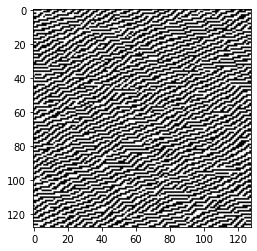

In [77]:
def echan2(im_bin,beta_reg):

    i=0;
    j=0;

    for i in range(im_bin.shape[0]):
        for j in range(im_bin.shape[1]):
          # do not change these indices 
          # they allow access to neighboring pixels  
          # i1,j and i2,j and i,j1 and i,j2
            i1=(i-1)%im_bin.shape[0]
            i2=(i+1)%im_bin.shape[0]
            j1=(j-1)%im_bin.shape[1]
            j2=(j+1)%im_bin.shape[1]

        # complete the calculation of energies and associated probabilities 
        # energy and non-normalized proba when the pixel is put in class 0
            Ureg0=(-1 if im_bin[i,j1]==0 else 0 + -1 if im_bin[i,j2]==0 else 0)*beta_reg
            Ureg0+=(1 if im_bin[i1,j]==0 else 0 + 1 if im_bin[i2,j]==0 else 0)*beta_reg
            Ureg0+=(-1 if im_bin[i2,j1]==0 else 0 + -1 if im_bin[i1,j2]==0 else 0)*beta_reg
            Ureg0+=(1 if im_bin[i1,j1]==0 else 0 + 1 if im_bin[i2,j2]==0 else 0)*beta_reg

            p0=math.exp(-Ureg0);

        # energy and non-normalized proba when the pixel is put in class 1
           # Ureg1=np.abs(im_bin[i1,j]-1  + im_bin[i2,j]-1 + im_bin[i,j1]-1 + im_bin[i1,j2]-1)*beta_reg
            #Ureg1=(np.abs(im_bin[i,j1]-1) + np.abs(im_bin[i,j2]-1))*beta_reg
            Ureg1=(-1 if im_bin[i,j1]==1 else 0 + -1 if im_bin[i,j2]==1 else 0)*beta_reg
            Ureg1+=(1 if im_bin[i1,j]==1 else 0 + 1 if im_bin[i2,j]==1 else 0)*beta_reg
            Ureg1+=(-1 if im_bin[i2,j1]==1 else 0 + -1 if im_bin[i1,j2]==1 else 0)*beta_reg
            Ureg1+=(1 if im_bin[i1,j1]==1 else 0 + 1 if im_bin[i2,j2]==1 else 0)*beta_reg


            p1=math.exp(-Ureg1);

        # sampling according to the normalized probabilities. NB: the normalization is done here
            if (p0+p1!=0.):
                if(random.uniform(0,1)<p0/(p0+p1)):
                    im_bin[i,j]= 0
                else :
                    im_bin[i,j]= 1

    return im_bin

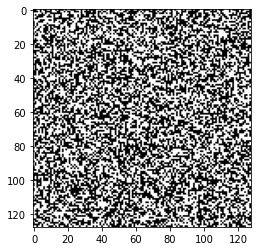

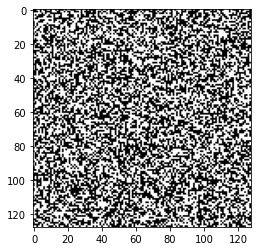

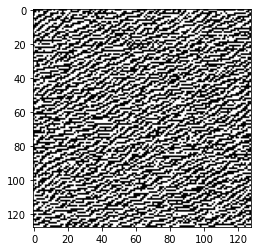

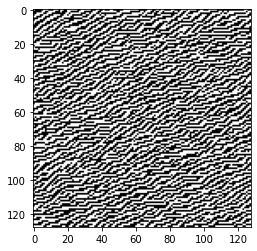

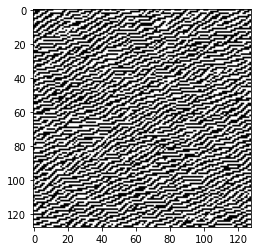

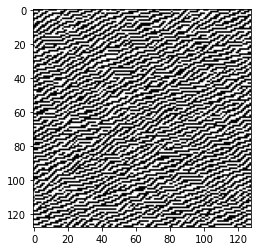

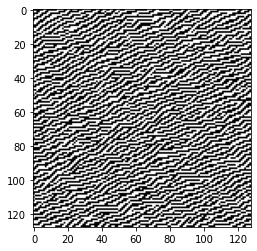

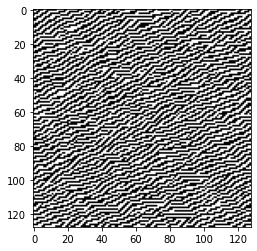

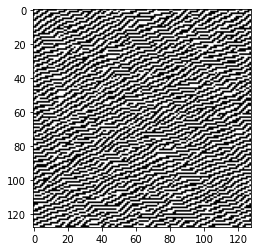

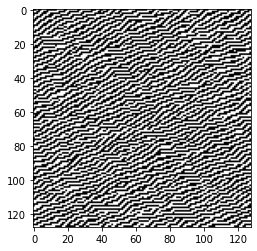

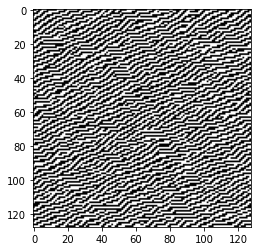

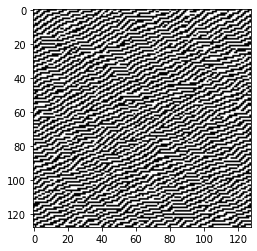

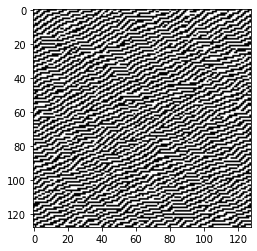

In [78]:
# random initialization of im_bin
plt.set_cmap('gray')
sh=[128,128]
im_bin=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(im_bin)

beta_reg=20
# 0.5 to 20

mafigure=plt.figure()
plt.imshow(im_bin);        
mafigure.canvas.draw()
plt.show()

for n in range(10):  
    echan2(im_bin,beta_reg) 
    plt.imshow(im_bin)      
    mafigure.canvas.draw()
    plt.show(block=False)
    

plt.figure()
plt.imshow(im_bin)
plt.show()

#Q8

Modify your program to define an Ising model with a diagonal attractive potential only (the other potentials are zero). Comment on the result. 

#A8
In rhe result we have homogeneous regions and very dissimilar regions, this can be interpret as the union of two superimposed non-interacting lattices, created by the Ising model with a diagonal attractive potential only.

The two lattices present in some zones similar behaviours and in other different behaviour, when they are united in the image it end up in regions with high an low homogenity.

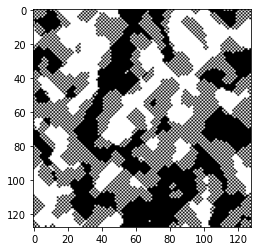

Code for answering the question 

In [32]:
def echan3(im_bin,beta_reg):

    i=0;
    j=0;

    for i in range(im_bin.shape[0]):
        for j in range(im_bin.shape[1]):
          # do not change these indices 
          # they allow access to neighboring pixels  
          # i1,j and i2,j and i,j1 and i,j2
            i1=(i-1)%im_bin.shape[0]
            i2=(i+1)%im_bin.shape[0]
            j1=(j-1)%im_bin.shape[1]
            j2=(j+1)%im_bin.shape[1]

        # complete the calculation of energies and associated probabilities 
        # energy and non-normalized proba when the pixel is put in class 0
            Ureg0=(0 if im_bin[i,j1]==0 else 0 + 0 if im_bin[i,j2]==0 else 0)*beta_reg
            Ureg0+=(0 if im_bin[i1,j]==0 else 0 + 0 if im_bin[i2,j]==0 else 0)*beta_reg
            Ureg0+=(1 if im_bin[i2,j1]==1 else 0 + 1 if im_bin[i1,j2]==1 else 0)*beta_reg
            Ureg0+=(1 if im_bin[i1,j1]==1 else 0 + 1 if im_bin[i2,j2]==1 else 0)*beta_reg

            p0=math.exp(-Ureg0);

        # energy and non-normalized proba when the pixel is put in class 1
           # Ureg1=np.abs(im_bin[i1,j]-1  + im_bin[i2,j]-1 + im_bin[i,j1]-1 + im_bin[i1,j2]-1)*beta_reg
            #Ureg1=(np.abs(im_bin[i,j1]-1) + np.abs(im_bin[i,j2]-1))*beta_reg
            Ureg1=(0 if im_bin[i,j1]==1 else 0 + 0 if im_bin[i,j2]==1 else 0)*beta_reg
            Ureg1+=(0 if im_bin[i1,j]==1 else 0 + 0 if im_bin[i2,j]==1 else 0)*beta_reg
            Ureg1+=(1 if im_bin[i2,j1]==0 else 0 + 1 if im_bin[i1,j2]==0 else 0)*beta_reg
            Ureg1+=(1 if im_bin[i1,j1]==0 else 0 + 1 if im_bin[i2,j2]==0 else 0)*beta_reg


            p1=math.exp(-Ureg1);

        # sampling according to the normalized probabilities. NB: the normalization is done here
            if (p0+p1!=0.):
                if(random.uniform(0,1)<p0/(p0+p1)):
                    im_bin[i,j]= 0
                else :
                    im_bin[i,j]= 1

    return im_bin

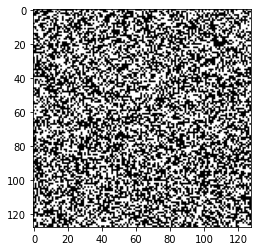

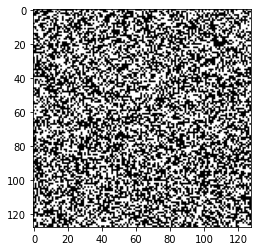

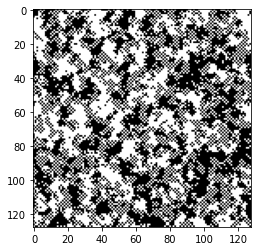

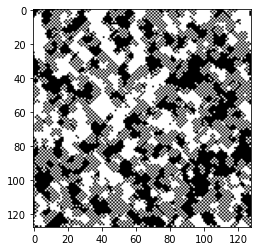

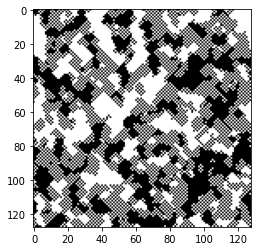

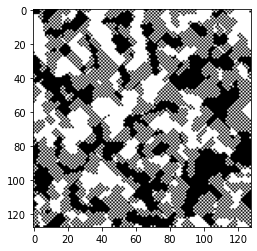

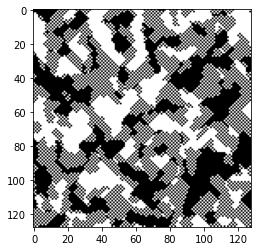

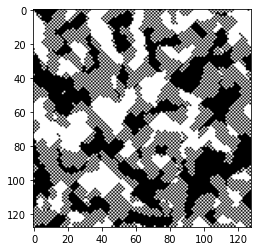

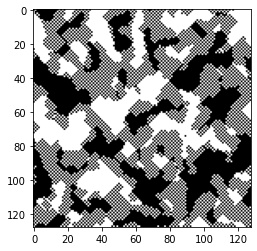

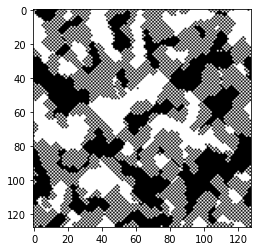

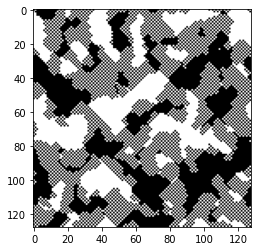

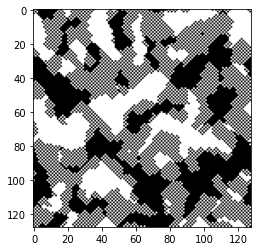

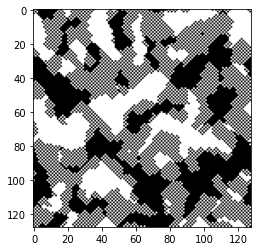

In [35]:
# random initialization of im_bin
plt.set_cmap('gray')
sh=[128,128]
im_bin=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(im_bin)

beta_reg=20
# 0.5 to 20

mafigure=plt.figure()
plt.imshow(im_bin);        
mafigure.canvas.draw()
plt.show()

for n in range(10):  
    echan3(im_bin,beta_reg) 
    plt.imshow(im_bin)      
    mafigure.canvas.draw()
    plt.show(block=False)
    

plt.figure()
plt.imshow(im_bin)
plt.show()